<a href="https://colab.research.google.com/github/poojaanbu0/mnist-classification/blob/main/dl_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
single_image= X_train[0]

In [5]:
single_image.shape

(28, 28)

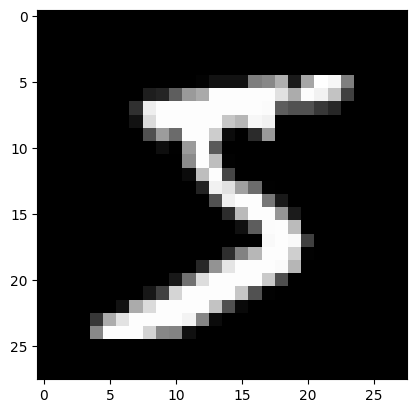

In [6]:
plt.imshow(single_image,cmap='gray')

In [7]:
y_train.shape

(60000,)

In [8]:
X_train.min()


0

In [9]:
X_train.max()

255

In [10]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
X_train_scaled.min()

0.0

In [12]:
X_train_scaled.max()

1.0

In [13]:
y_train[0]

5

In [17]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [15]:
type(y_train_onehot)

numpy.ndarray

In [16]:
y_train_onehot.shape

(60000, 10)

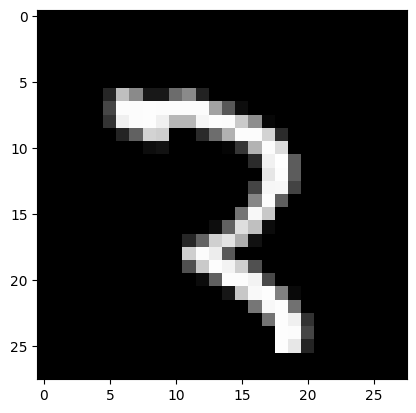

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 16)                86544     
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                        

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [25]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 30s 31ms/step - loss: 0.3063 - accuracy: 0.9053 - val_loss: 0.1207 - val_accuracy: 0.9625
Epoch 2/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0974 - accuracy: 0.9706 - val_loss: 0.0873 - val_accuracy: 0.9735
Epoch 3/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0691 - accuracy: 0.9794 - val_loss: 0.0688 - val_accuracy: 0.9782
Epoch 4/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0535 - accuracy: 0.9840 - val_loss: 0.0542 - val_accuracy: 0.9830
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0519 - val_accuracy: 0.9835


In [26]:
metrics = pd.DataFrame(model.history.history)

In [27]:
print("Pooja A")
print("212222240072")
metrics.head()

Pooja A
212222240072


,loss,accuracy,val_loss,val_accuracy
0,0.306308,0.905300,0.120708,0.9625
1,0.097350,0.970617,0.087340,0.9735
2,0.069148,0.979450,0.068795,0.9782
3,0.053506,0.983983,0.054206,0.9830
4,0.044730,0.986333,0.051936,0.9835


Pooja A
212222240072


<Axes: >

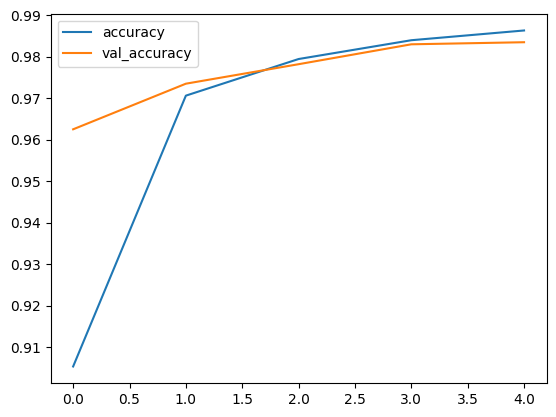

In [28]:
print("Pooja A")
print("212222240072")
metrics[['accuracy','val_accuracy']].plot()

Pooja A
212222240072


<Axes: >

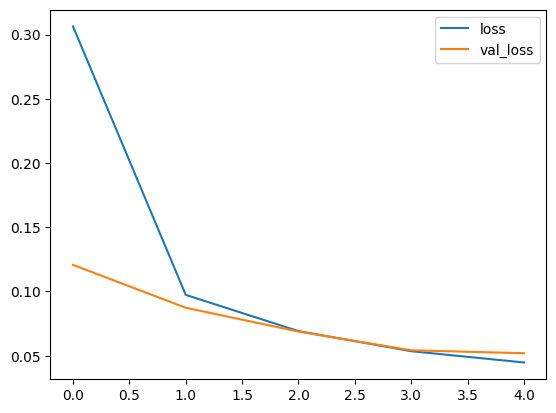

In [29]:
print("Pooja A")
print("212222240072")
metrics[['loss','val_loss']].plot()

In [30]:
print("Pooja A")
print("212222240072")
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

Pooja A
212222240072
313/313 [==============================] - 2s 6ms/step


In [31]:
print("Pooja A")
print("212222240072")
print(confusion_matrix(y_test,x_test_predictions))

Pooja A
212222240072
[[ 970    0    1    1    1    1    6    0    0    0]
 [   0 1132    1    1    0    0    0    0    1    0]
 [   1    4 1008    2    5    0    2    7    2    1]
 [   0    0    2  996    0    7    0    2    1    2]
 [   0    0    0    0  978    0    1    0    0    3]
 [   0    0    0    5    0  884    3    0    0    0]
 [   2    3    1    0    1    1  950    0    0    0]
 [   1    3    5    3    3    0    0 1010    1    2]
 [   6    0    7    2    5    5    7    3  934    5]
 [   1    1    1    5   17    6    0    4    1  973]]


In [32]:
print("Pooja A")
print("212222240072")
print(classification_report(y_test,x_test_predictions))


Pooja A
212222240072
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [34]:
img = image.load_img('/content/images.png')


In [37]:
type(img)

PIL.Image.Image

In [39]:
img = image.load_img('/content/images.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [40]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [41]:
print(x_single_prediction)

[5]


Pooja A
212222240072


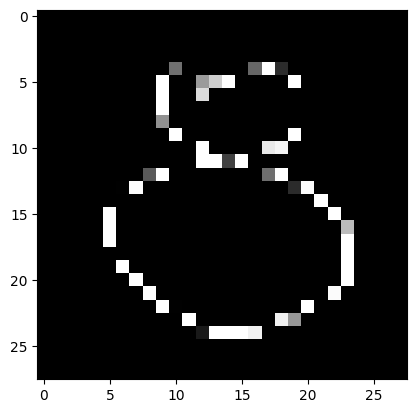

In [42]:
print("Pooja A")
print("212222240072")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [43]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [44]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 59ms/step


In [46]:
print("Pooja A")
print("212222240082")
print(x_single_prediction)

Pooja A
212222240082
[8]
